In [52]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [53]:
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

In [54]:
song = AudioSegment.from_wav("Test.wav")

In [55]:
chunks = split_on_silence (
    # Use the loaded audio.
    song,
    min_silence_len = 2000,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -22
)

In [56]:
for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    #silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    filename = f'splitaudio/chunk{i}.wav'
    print("Exporting chunk{0}.wav.".format(i))
    normalized_chunk.export(
        filename,
        bitrate = "16k",
        format = "wav"
    )

Exporting chunk0.wav.
Exporting chunk1.wav.


In [57]:
import os
import glob

In [58]:
if not os.path.isdir("audio"):
    os.mkdir("audio")

In [59]:
wavfiles  = glob.glob("./splitaudio/*.wav")
print(wavfiles)

['./splitaudio/chunk0.wav', './splitaudio/chunk1.wav']


In [60]:
wavs = [AudioSegment.from_wav(wav) for wav in wavfiles]

In [61]:
combined = wavs[0]

# Appending all the audio file
for wav in wavs[1:]:
    combined = combined.append(wav)

# Export Merged Audio File
combined.export("./audio/Mergedaudio.wav", format="wav")

<_io.BufferedRandom name='./audio/Mergedaudio.wav'>

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
sound= AudioSegment.from_wav('audio/Mergedaudio.wav')
x = np.array(song.get_array_of_samples())

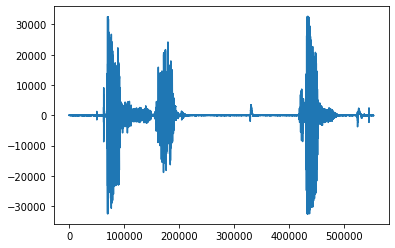

In [64]:
plt.plot(x)
plt.show()

In [65]:
f = []
w = 256
for i in range(round(len(x)/w)-1):
    f.append(x[i*w:(i+1)*w-1])
len(f)

2159

In [66]:
another = AudioSegment.from_wav('Test.wav')
a = np.array(another.get_array_of_samples())

In [67]:
f = []
w = 256
for i in range(round(len(a)/w)-1):
    f.append(a[i*w:(i+1)*w-1])
len(f)

2159